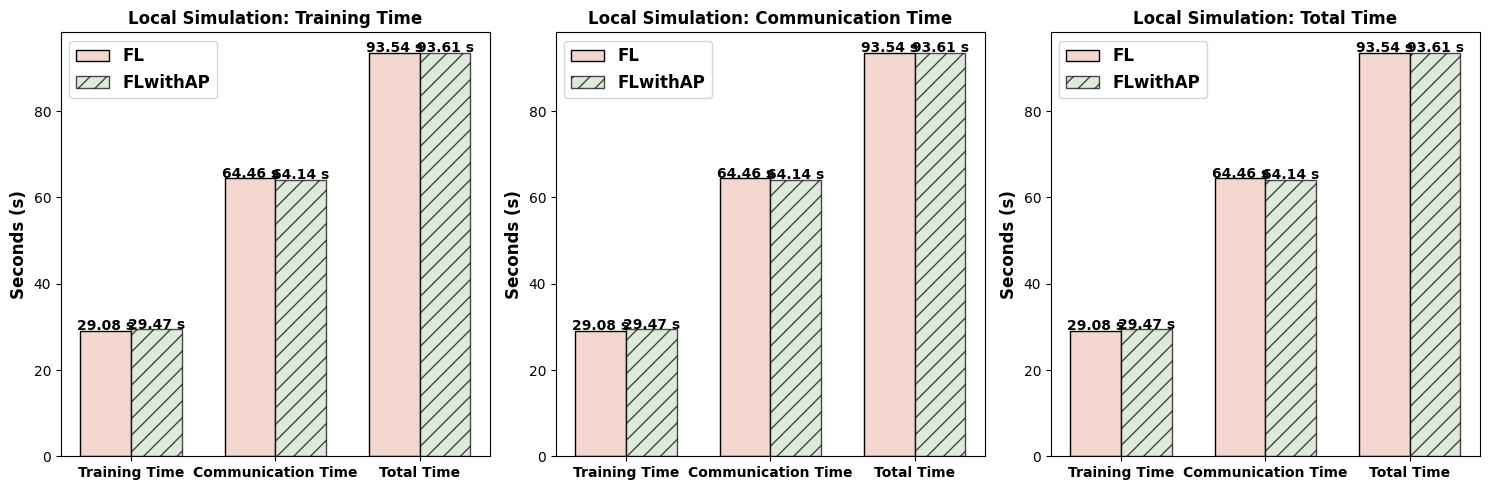

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load data from CSV files
df_FL = pd.read_csv('FL_performance_metrics.csv')
df_FLwithAP = pd.read_csv('FLwithAP_performance_metrics.csv')

# Extract relevant columns
labels = ['Training Time', 'Communication Time', 'Total Time']
values_FL = [
    df_FL['Training Time'].mean(), 
    df_FL['Communication Time'].mean(), 
    df_FL['Total Time'].mean()
]
values_FLwithAP = [
    df_FLwithAP['Training Time'].mean(), 
    df_FLwithAP['Communication Time'].mean(), 
    df_FLwithAP['Total Time'].mean()
]

# Bar width for charts
bar_width = 0.35

# Create the subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  

# Chart for training time, communication time, and total time comparison
bar_positions = np.arange(len(labels))
axs[0].bar(bar_positions - bar_width / 2, values_FL, bar_width, color='#f3d6ce', label='FL', edgecolor='black')
axs[0].bar(bar_positions + bar_width / 2, values_FLwithAP, bar_width, color='#d0e3cc', label="FLwithAP", alpha=0.7, edgecolor='black', hatch='//')

# Add values and unit to the bars
for i, v in enumerate(values_FL):
    axs[0].text(i - bar_width / 2, v + 0.1, f'{v:.2f} s', color='black', ha='center', weight='bold', fontsize=10)

for i, v in enumerate(values_FLwithAP):
    axs[0].text(i + bar_width / 2, v + 0.1, f'{v:.2f} s', color='black', ha='center', weight='bold', fontsize=10)

axs[0].set_title('Local Simulation: Training Time', weight='bold', fontsize=12)
axs[0].set_xticks(bar_positions)
axs[0].set_xticklabels(labels, weight='bold', fontsize=10)
legend = axs[0].legend(['FL', "FLwithAP"], fontsize='large')
for text in legend.get_texts():
    text.set_fontweight('bold')
axs[0].set_ylabel('Seconds (s)', weight='bold', fontsize=12)  

# Repeat for the second chart (Communication Time)
axs[1].bar(bar_positions - bar_width / 2, values_FL, bar_width, color='#f3d6ce', label='FL', edgecolor='black')
axs[1].bar(bar_positions + bar_width / 2, values_FLwithAP, bar_width, color='#d0e3cc', label="FLwithAP", alpha=0.7, edgecolor='black', hatch='//')

for i, v in enumerate(values_FL):
    axs[1].text(i - bar_width / 2, v + 0.1, f'{v:.2f} s', color='black', ha='center', weight='bold', fontsize=10)

for i, v in enumerate(values_FLwithAP):
    axs[1].text(i + bar_width / 2, v + 0.1, f'{v:.2f} s', color='black', ha='center', weight='bold', fontsize=10)

axs[1].set_title('Local Simulation: Communication Time', weight='bold', fontsize=12)
axs[1].set_xticks(bar_positions)
axs[1].set_xticklabels(labels, weight='bold', fontsize=10)
legend = axs[1].legend(['FL', "FLwithAP"], fontsize='large')
for text in legend.get_texts():
    text.set_fontweight('bold')
axs[1].set_ylabel('Seconds (s)', weight='bold', fontsize=12)

# Repeat for the third chart (Total Time)
axs[2].bar(bar_positions - bar_width / 2, values_FL, bar_width, color='#f3d6ce', label='FL', edgecolor='black')
axs[2].bar(bar_positions + bar_width / 2, values_FLwithAP, bar_width, color='#d0e3cc', label="FLwithAP", alpha=0.7, edgecolor='black', hatch='//')

for i, v in enumerate(values_FL):
    axs[2].text(i - bar_width / 2, v + 0.1, f'{v:.2f} s', color='black', ha='center', weight='bold', fontsize=10)

for i, v in enumerate(values_FLwithAP):
    axs[2].text(i + bar_width / 2, v + 0.1, f'{v:.2f} s', color='black', ha='center', weight='bold', fontsize=10)

axs[2].set_title('Local Simulation: Total Time', weight='bold', fontsize=12)
axs[2].set_xticks(bar_positions)
axs[2].set_xticklabels(labels, weight='bold', fontsize=10)
legend = axs[2].legend(['FL', "FLwithAP"], fontsize='large')
for text in legend.get_texts():
    text.set_fontweight('bold')
axs[2].set_ylabel('Seconds (s)', weight='bold', fontsize=12)

# Adjust space between subplots
plt.tight_layout()
plt.savefig('LocalSimulationBenchmark.pdf')
plt.show()